In [1]:
from Util import *

In [2]:
W, H = SIZE = (100, 200)
MARGIN = 1/40
X, y = [], []
N = 100
try:
    with open("exist.dat", "rb") as f:
        X, y = pickle.load(f)
except FileNotFoundError:
    with open("ball_markup.json", "r") as f:
        data: dict = json.load(f)
    
    cam = cv2.VideoCapture("game_1.mp4")
    frame_count = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
    _, img = cam.read()
    h, w, c = img.shape
    mid = w/2
    low, high = lowhigh(w, MARGIN)
    count = 0
    pos = set(int(i) for i in filter(lambda x: low<=int(data[x]["x"])<=high, data.keys()))
    l = list(range(frame_count))
    random.shuffle(l)
    print(f"There are {len(pos)} # of points")
    for frame in pos:
        cam.set(cv2.CAP_PROP_POS_FRAMES, frame)
        _, img = cam.read()
        h, w, c = img.shape
        img = img[0:h*2//3, low:high]
        cv2.bitwise_and(img, img, mask=cv2.inRange(img, (100, 100, 100), (255, 255, 255)))
        img = cv2.resize(img, SIZE, interpolation=cv2.INTER_LINEAR)
        
        X.append(cv2.split(img))
        y.append([1, 0])
    for frame in l:
        if frame in pos:
            continue
        count+=1
        cam.set(cv2.CAP_PROP_POS_FRAMES, frame)
        _, img = cam.read()
        h, w, c = img.shape
        img = img[0:h*2//3, low:high]
        cv2.bitwise_and(img, img, mask=cv2.inRange(img, (100, 100, 100), (255, 255, 255)))

        img = cv2.resize(img, SIZE, interpolation=cv2.INTER_LINEAR)
        X.append(cv2.split(img))
        y.append([0, 1])
        if count >= len(pos): break
    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)
    cam.release()
    with open("exist.dat", "wb") as f:
        pickle.dump((X, y), f)
train_X, val_X, test_X, train_y, val_y, test_y = preprocess(X, y)

There are 843 # of points


In [3]:
net2 = load("existnet.dat", NN2([3, 6, 9, 12, 15], [600, 2]))

100%|██████████| 1500/1500 [03:16<00:00,  7.62it/s]


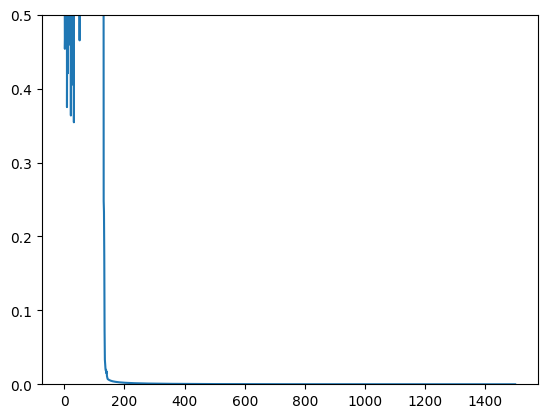

In [7]:
net2.my_train(train_X, train_y, val_X, val_y, 1500)
with open("existnet.dat", "wb") as f:
    pickle.dump(net2, f)

In [8]:
print(net2.ratio(test_X, test_y))

tensor([3.2751e-14, 1.0000e+00], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([0., 1.], device='cuda:0')
tensor([3.7734e-07, 1.0000e+00], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([0., 1.], device='cuda:0')
tensor([1.0000e+00, 1.7006e-19], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([1., 0.], device='cuda:0')
tensor([1.0000e+00, 2.9722e-09], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([1., 0.], device='cuda:0')
tensor([0.1265, 0.8735], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([1., 0.], device='cuda:0')
tensor([1.0000e+00, 2.6105e-20], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([1., 0.], device='cuda:0')
tensor([0.0010, 0.9990], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([0., 1.], device='cuda:0')
tensor([1.0000e+00, 5.7955e-11], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([1., 0.], device='cuda:0')
tensor([7.3190e-17, 1.0000e+00], device='cuda:0', grad_fn=<UnbindBackward0>) tensor([1., 0.], device='cuda:0')
tensor([1.0000e+0

In [9]:
cam = cv2.VideoCapture("game_1.mp4")
cam.set(cv2.CAP_PROP_FPS, 10)
hasNext = True
count = 0
counts = [0]*2

while hasNext:
    hasNext, img = cam.read()
    # cv2.imshow('i', img)
    h, w, _ = img.shape
    low, high = lowhigh(w, 1/50)
    img = img[:h*2//3, low:high]
    cv2.bitwise_and(img, img, mask=cv2.inRange(img, (100, 100, 100), (255, 255, 255)))

    img = cv2.resize(img, (W, H))
    x = np.array(cv2.split(img), dtype=np.float32)
    x = torch.from_numpy(x).to(device)
    v = net2.predict(x)
    if v[0] - v[1] > 0.8:
        cv2.imshow('i', img)

        print(cam.get(cv2.CAP_PROP_POS_FRAMES), v)
        if cv2.waitKey(0) == ord('a'):
            break
    # count += 1
    # counts[int(v[0]>v[1])] += 1
    # if v[0] > v[1]:
    #     print(cam.get(cv2.CAP_PROP_POS_FRAMES))
    # if count > 100:
    #     break
print(counts)
cv2.destroyAllWindows()
cam.release()

8.0 tensor([0.9744, 0.0256], device='cuda:0', grad_fn=<SqueezeBackward1>)
9.0 tensor([0.9777, 0.0223], device='cuda:0', grad_fn=<SqueezeBackward1>)
11.0 tensor([0.9690, 0.0310], device='cuda:0', grad_fn=<SqueezeBackward1>)
13.0 tensor([1.0000e+00, 4.1934e-07], device='cuda:0', grad_fn=<SqueezeBackward1>)
14.0 tensor([0.9066, 0.0934], device='cuda:0', grad_fn=<SqueezeBackward1>)
15.0 tensor([1.0000e+00, 1.1445e-08], device='cuda:0', grad_fn=<SqueezeBackward1>)
17.0 tensor([0.9898, 0.0102], device='cuda:0', grad_fn=<SqueezeBackward1>)
18.0 tensor([1.0000e+00, 3.2692e-07], device='cuda:0', grad_fn=<SqueezeBackward1>)
19.0 tensor([1.0000e+00, 7.3111e-08], device='cuda:0', grad_fn=<SqueezeBackward1>)
20.0 tensor([0.9891, 0.0109], device='cuda:0', grad_fn=<SqueezeBackward1>)
22.0 tensor([9.9976e-01, 2.3553e-04], device='cuda:0', grad_fn=<SqueezeBackward1>)
23.0 tensor([1.0000e+00, 1.1584e-08], device='cuda:0', grad_fn=<SqueezeBackward1>)
24.0 tensor([1.0000e+00, 6.2839e-09], device='cuda:0',